Travelling Salesman Problem

For the rest of this tutorial we will deal with the following version (unless stated otherwise): we want to minimize covered distance, which are symmetrical and we don't care about what is the last city.

Looking at it mathematically, you have the following elements here:

representation of the problem - usually it's either:
graph - each node represents a city and each edge the distance between two cities,
distance matrix - a matrix, where row and column represents a city and each entry is a distance.
cost function - what we want to minimize - in our case it's the sum of the distances.
answer - how do we encode our result? For example, we may want to have a list: [B, C, A, D].

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
def assign_cities(N):
    #creates arry for random points of input size N

    cities = []
    for i in range(N):
        cities.append(np.random.rand(2)*10)
    return np.array(cities)

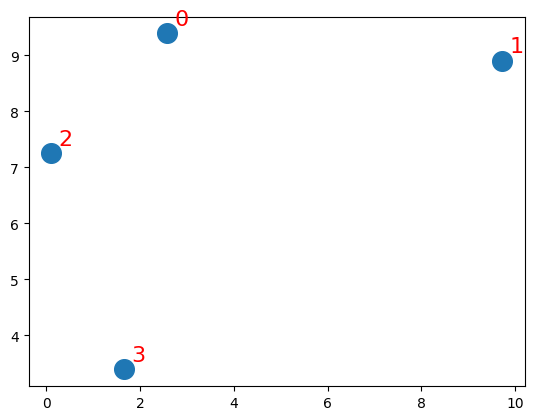

In [94]:
cities = assign_cities(4)
from plots import plt_cities
plt_cities(cities)

In [95]:
import itertools


def distance(point1, point2):
    #calculates the distance between cities in order
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def total_distance(cities):
    no_cities = len(cities)
    matrix = np.zeros((no_cities, no_cities))
    for i in range(no_cities):
        for j in range(i, no_cities):
            matrix[i][j] = distance(cities[i], cities[j])
            matrix[j][i] = matrix[i][j]
        return matrix

In [97]:
distance_matrix = total_distance(cities)
print(distance_matrix)

[[0.         7.15380634 3.27300759 6.07310292]
 [7.15380634 0.         0.         0.        ]
 [3.27300759 0.         0.         0.        ]
 [6.07310292 0.         0.         0.        ]]


In [99]:

def cost_fun(cost_matrix, solution):
    #calculates the cost of the solution
    cost = 0
    return sum([cost_matrix[a][b] for a, b in zip(solution, solution[1:])])

def solve_tsp_trial_error(cities, initial_city, verbose = True):
    #solves the TSP using trial and error
    no_cities = len(cities)
    initial_order = range(no_cities)
    cost_matrix = total_distance(cities)

    all_permutations = [list(x) for x in itertools.permutations(initial_order)]
    best_permuation = all_permutations[0]
    best_cost = cost_fun(cost_matrix, best_permuation)*1000

    for permuation in all_permutations:
        if permuation[0] != initial_city:
            continue
        current_cost = cost_fun(cost_matrix, permuation)
        if current_cost < best_cost:
            best_permuation = permuation
            best_cost = current_cost

    if verbose:
        print("Best cost: ", best_cost)
        print("Best permutation: ", best_permuation)
    return best_permuation


In [100]:
solution = solve_tsp_trial_error(cities, 0)

Best cost:  3.2730075920937054
Best permutation:  [0, 2, 1, 3]


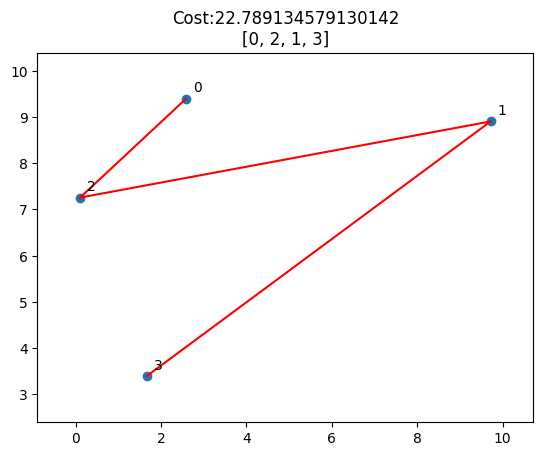

In [122]:
from plots import plt_cities


def plt_solution(cities, solution):
    
    plt.scatter(cities[:, 0], cities[:, 1])
    for i, city in enumerate(cities):
        plt.annotate(str(i), (city[0], city[1]), xytext=(5, 5), textcoords='offset points')
    plt.xlim([min(cities[:, 0]) - 1, max(cities[:, 0]) + 1])
    plt.ylim([min(cities[:, 1]) - 1, max(cities[:, 1]) + 1])
    for i in range(len(solution) - 1):
        a = i%len(solution)
        b = (i+1)%len(solution)
        A = solution[a]
        B = solution[b]
        plt.plot([cities[A, 0], cities[B, 0]], [cities[A, 1], cities[B, 1]], c='r')
    cost = cost_fun(distance_matrix(cities), solution)
    title_string = "Cost:" + str(cost)
    title_string += "\n" + str(solution)
    plt.title(title_string)
plt_solution(cities, solution)


Best cost:  3.0739638587933773
Best permutation:  [0, 5, 1, 2, 3, 4]


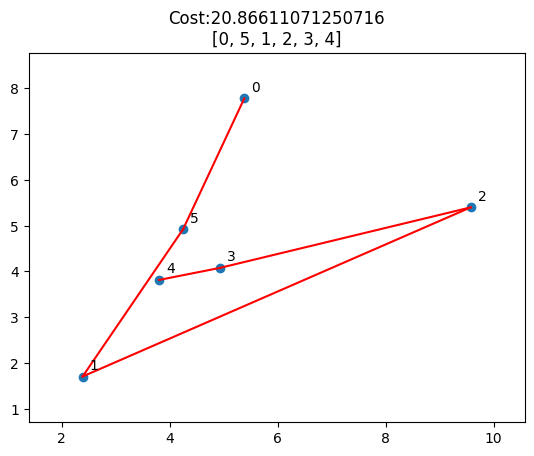

In [123]:
cities_6 = assign_cities(6)
solution = solve_tsp_trial_error(cities_6, 0)
plt_solution(cities_6, solution)

Best cost:  1.5404006539671988
Best permutation:  [0, 7, 1, 2, 3, 4, 5, 6, 8, 9]


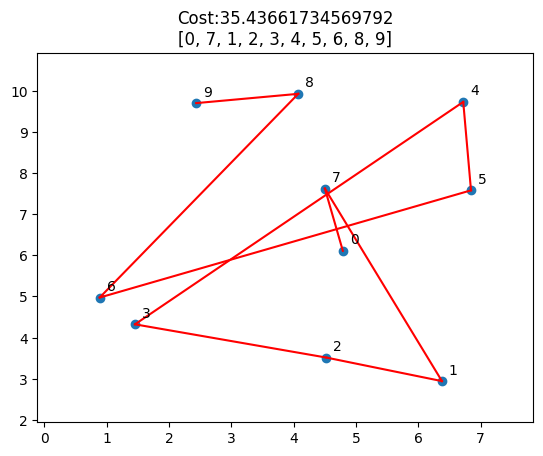

In [124]:
cities_10 = assign_cities(10)
solution = solve_tsp_trial_error(cities_10, 0)
plt_solution(cities_10, solution)

In [125]:
for i in range(4,10):
    print(i, "cities")
    %time solution = solve_tsp_trial_error(assign_cities(i), 0, verbose=False)

4 cities
CPU times: user 310 µs, sys: 436 µs, total: 746 µs
Wall time: 715 µs
5 cities
CPU times: user 321 µs, sys: 389 µs, total: 710 µs
Wall time: 374 µs
6 cities
CPU times: user 491 µs, sys: 277 µs, total: 768 µs
Wall time: 541 µs
7 cities
CPU times: user 3.37 ms, sys: 1.51 ms, total: 4.88 ms
Wall time: 4.76 ms
8 cities
CPU times: user 27 ms, sys: 4.9 ms, total: 31.9 ms
Wall time: 62.6 ms
9 cities
CPU times: user 243 ms, sys: 30.2 ms, total: 273 ms
Wall time: 280 ms


4 cities
41.8 µs ± 14.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5 cities
75.1 µs ± 873 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
6 cities
335 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7 cities
2.16 ms ± 9.97 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8 cities
17.2 ms ± 224 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9 cities
161 ms ± 607 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


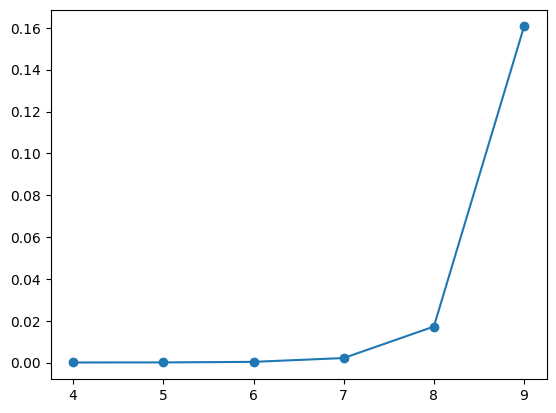

In [126]:
calulation_time = []
city_sizes = range(4, 10)
for i in city_sizes:
    print(i, "cities")
    calc_time = %timeit -o -n 100 solve_tsp_trial_error(assign_cities(i), 0, verbose=False)
    calulation_time.append(calc_time.average)

plt.plot(city_sizes, calulation_time, 'o-')


In [127]:
pip install pbd

  Preparing metadata (setup.py) ... done
  Created wheel for pbd: filename=pbd-0.9-py3-none-any.whl size=3880 sha256=9807d6e959d36dd2a89760ae52c64c64fda18766bf71aa9305173050c4badd31
  Stored in directory: /Users/shreyupadhyay/Library/Caches/pip/wheels/ce/96/3a/0dc9db9789fc4072cb05da575c782356ccd252fb3142d2f46d
Successfully built pbd

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


**Using Classical simple anneling approch** 

using the Temprature dependence we can approximiate the cost funstion

In [133]:
from simulation_annealing import *

def solve_tas_annealing(cities, initial_city):
    sa = SimulationAnnealing(cities, stopping_iter=5000, starting_city=initial_city)
    sa.anneal()
    solution = sa.get_best_solution()
    return solution

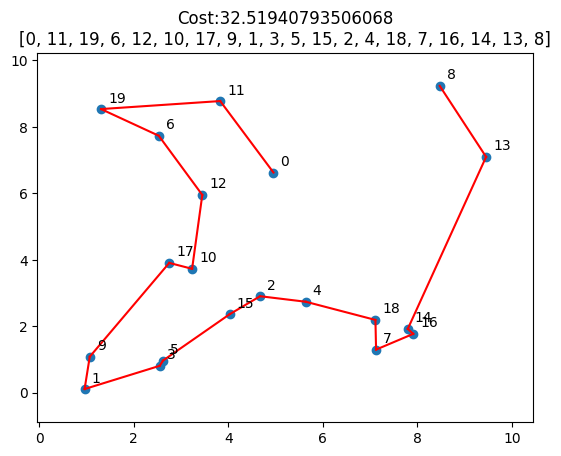

In [134]:
cities = create_cities(20)
solution = solve_tas_annealing(cities, 0)
plt_solution(cities, solution)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import numpy as np
def points_to_binary(points):

    no_points = len(points)
    binary_conv = np.zeros((len(points))**2)
    for i in range(len(points)):
        p = points[i]
        binary_conv[(no_points) * (i)+ p[1]] = 1
    return binary_conv
# converts ordered points to binary 

def binary_to_points(binary):
    # converts binary to ordered points
    no_points = int(np.sqrt(len(binary)))
    points = []
    for i in range(no_points):
        for j in range(no_points):
            if binary[i*no_points + j] == 1:
                points.append(j)
    return points

In [3]:
points = [(0, 0), (1, 1), (2, 2)]

binary_points = points_to_binary(points)
points = binary_to_points(binary_points)

print("binary", points, "is", binary_points)
print("points", binary_points, "is", points)

binary [0, 1, 2] is [1. 0. 0. 0. 1. 0. 0. 0. 1.]
points [1. 0. 0. 0. 1. 0. 0. 0. 1.] is [0, 1, 2]


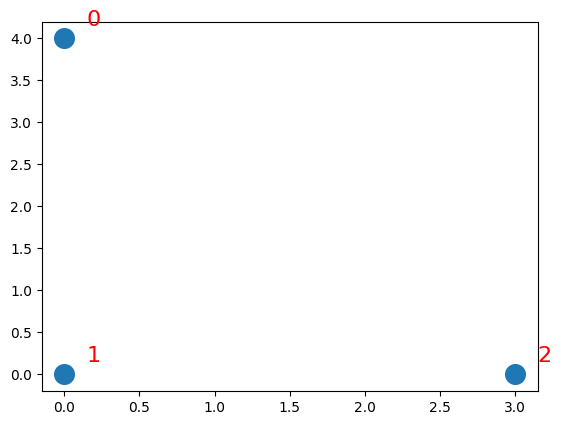

In [4]:
import utilities
import plots
import matplotlib.pyplot as plt

cities = np.array([[0,4], [0,0], [3,0]])

distance_matrix = utilities.total_distance_matrix(cities)
plots.plt_cities(cities)
plt.show()


In [59]:
import pennylane as qml
import numpy as np
import scipy.optimize

from TSPpennylane_trail import *
points = [(0, 0), (1, 1), (2, 2)]
distance_matrix = utilities.total_distance_matrix(points)
tsp_solver = PennyLaneTSPSolverNaive(distance_matrix, steps=10, use_constraints=False)

# Test the new methods
binary_points = tsp_solver.points_to_binary(points)
converted_points = tsp_solver.binary_to_points(binary_points)

print("Binary representation of points:", binary_points)
print("Converted back to points:", converted_points)

# Solve TSP
solution, probabilities = tsp_solver.solve_tsp()
print("The solution is:", solution)
print("Probabilities:", probabilities)


Binary representation of points: [1. 0. 0. 0. 1. 0. 0. 0. 1.]
Converted back to points: [0, 1, 2]
The solution is: [0, 1, 2]
Probabilities: [2.64181660e-07 3.80428269e-06 1.63535798e-06 4.33543082e-06
 2.64181660e-07 3.80428269e-06 1.63535798e-06 4.33543082e-06
 1.33471231e-06 2.06412811e-03 2.27692918e-05 1.09525329e-02
 1.33471231e-06 2.06412811e-03 2.27692918e-05 1.09525329e-02
 3.31411546e-06 3.21445540e-06 1.27571569e-05 3.02069404e-05
 3.31411546e-06 3.21445540e-06 1.27571569e-05 3.02069404e-05
 1.30625440e-04 4.59515401e-05 2.32720796e-05 1.09525329e-02
 1.30625440e-04 4.59515401e-05 2.32720796e-05 1.09525329e-02
 1.33471231e-06 1.25849047e-06 7.36844064e-07 1.29772051e-06
 1.33471231e-06 1.25849047e-06 7.36844064e-07 1.29772051e-06
 8.56908274e-05 6.82095274e-05 2.65062729e-04 3.02069404e-05
 8.56908274e-05 6.82095274e-05 2.65062729e-04 3.02069404e-05
 1.30625440e-04 7.94894239e-06 6.47194767e-06 1.29772051e-06
 1.30625440e-04 7.94894239e-06 6.47194767e-06 1.29772051e-06
 8.863

Creating cost operators

In [60]:
from utilities import *
distance_matrix = total_distance_matrix(cities)
print(distance_matrix)
no_cities = len(cities) 

[[0. 4. 5.]
 [4. 0. 3.]
 [5. 3. 0.]]


In [61]:
tsp_solver = PennyLaneTSPSolverNaive(distance_matrix, steps=10, use_constraints=False)
cost_hamiltonian = tsp_solver.create_cost_hamiltonian()
print(cost_hamiltonian)

  (3.0) [Z1 Z5]
+ (3.0) [Z4 Z8]
+ (4.0) [Z0 Z4]
+ (4.0) [Z3 Z7]
+ (5.0) [Z0 Z5]
+ (5.0) [Z3 Z8]


Penalty matrices

In [62]:
Z = np.array([[1, 0], [0, -1]])
np.eye(4) - np.kron(Z, Z)


array([[0., 0., 0., 0.],
       [0., 2., 0., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 0.]])

In [63]:
ZI_permuation = np.kron(Z,np.kron(Z,Z))
print("Product of ZI:", ZI_permuation)
print("Operations:")
penalty = 0.5*(np.eye(8) + ZI_permuation)
print(penalty)

Product of ZI: [[ 1  0  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0 -1]]
Operations:
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [64]:
dummpy_op = 0.5*(np.eye(2)-Z)
print("Operations:")
print(dummpy_op)
penalty_1 = np.kron(dummpy_op, np.kron(dummpy_op, dummpy_op))
print("Penalty 111 states:")
print(penalty_1)

Operations:
[[0. 0.]
 [0. 1.]]
Penalty 111 states:
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [65]:
print("All operationns:")
all_penalties = penalty + penalty_1
print(all_penalties)

All operationns:
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [66]:
import numpy as np

def create_penalty_operators_for_qubits(qubits):
    weight = 1.0
    penalty_operators = []
    for i in range(len(qubits)):
        for j in range(i + 1, len(qubits)):
            penalty_operators.append((weight, qubits[i], qubits[j]))
    return penalty_operators

def create_penalty_operators_for_repetition(number_of_cities):
    penalty_operators = []
    for city in range(number_of_cities):
        qubits = [city + t * number_of_cities for t in range(number_of_cities)]
        penalty_operators.extend(create_penalty_operators_for_qubits(qubits))
    return penalty_operators

def create_penalty_operators_for_bilocation(number_of_cities):
    penalty_operators = []
    for t in range(number_of_cities):
        qubits = [t * number_of_cities + city for city in range(number_of_cities)]
        penalty_operators.extend(create_penalty_operators_for_qubits(qubits))
    return penalty_operators

def create_weights_cost_operators(distance_matrix):
    cost_operators = []
    number_of_cities = len(distance_matrix)
    for i in range(number_of_cities):
        for j in range(i, number_of_cities):
            for t in range(number_of_cities - 1):
                weight = -distance_matrix[i][j] / 2
                if distance_matrix[i][j] != 0:
                    qubit_1 = t * number_of_cities + i
                    qubit_2 = (t + 1) * number_of_cities + j
                    cost_operators.append((weight, qubit_1, qubit_2))
    return cost_operators

def create_cost_operators(distance_matrix):
    number_of_cities = len(distance_matrix)
    penalty_operators_repetition = create_penalty_operators_for_repetition(number_of_cities)
    penalty_operators_bilocation = create_penalty_operators_for_bilocation(number_of_cities)
    weights_cost_operators = create_weights_cost_operators(distance_matrix)
    all_cost_operators = penalty_operators_repetition + penalty_operators_bilocation + weights_cost_operators
    return all_cost_operators


In [67]:
distance_matrix = utilities.total_distance_matrix(cities)

tsp_solver = PennyLaneTSPSolverNaive(distance_matrix, use_constraints=True)
solution, naive_distribution = tsp_solver.solve_tsp()
print("The solution is:", solution)

The solution is: [1, 2, 2]


In [68]:
import matplotlib.pyplot as plt

def plot_state_histogram(states_with_probs):
    states, probs = zip(*states_with_probs)
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(states)), probs, align='center')
    plt.yticks(range(len(states)), states)
    plt.xlabel('Probability')
    plt.ylabel('State')
    plt.title('Top 10 Most Probable States')
    plt.tight_layout()
    plt.show()


In [69]:
tsp_solver = PennyLaneTSPSolverNaive(distance_matrix, steps=10, use_constraints=True)
solution, _ = tsp_solver.solve_tsp()


states_with_probs = []
for state, prob in tsp_solver.sampling_results.items():
    states_with_probs.append([state, prob])
states_with_probs = sorted(states_with_probs, key=lambda x: -x[1])

# Plot top 10 states
plot_state_histogram(states_with_probs[:10][::-1])

print("The solution is:", solution)

AttributeError: 'PennyLaneTSPSolverNaive' object has no attribute 'sampling_results'

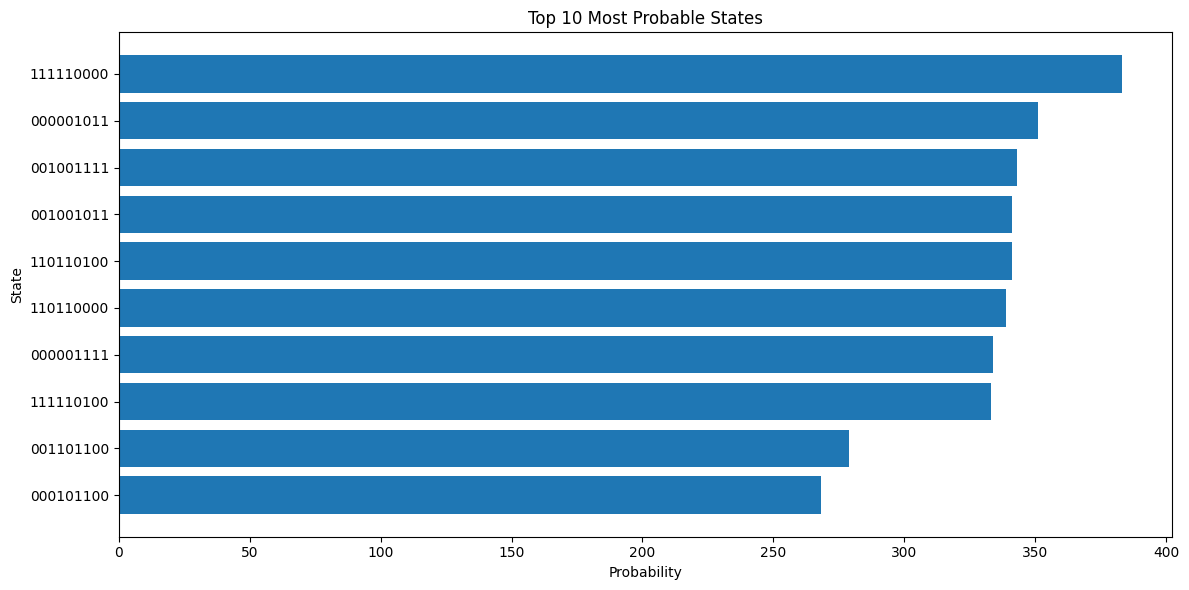

The solution is: [0, 1, 2, 0, 1]


In [ ]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

class PennyLaneTSPSolverNaive:
    def __init__(self, distance_matrix, steps=1, ftol=1.0e-2, xtol=1.0e-2, use_constraints=False):
        self.distance_matrix = distance_matrix
        self.steps = steps
        self.ftol = ftol
        self.xtol = xtol
        self.use_constraints = use_constraints
        self.number_of_qubits = self.get_number_of_qubits()
        self.dev = qml.device("default.qubit", wires=self.number_of_qubits, shots=10000)
        self.circuit = qml.QNode(self.circuit_definition, self.dev)
        self.probability_circuit = qml.QNode(self.probability_circuit_definition, self.dev)
        self.sampling_results = None  # Initialize as None

    def get_number_of_qubits(self):
        return len(self.distance_matrix)**2

    def create_cost_hamiltonian(self):
        cost_operators = []
        number_of_cities = len(self.distance_matrix)
        
        # Create base Identity operator
        base_hamiltonian = qml.Hamiltonian([0.0], [qml.Identity(0)])
        
        for i in range(number_of_cities):
            for j in range(i, number_of_cities):
                for t in range(number_of_cities - 1):
                    weight = -self.distance_matrix[i][j] / 2
                    if self.distance_matrix[i][j] != 0:
                        qubit_1 = t * number_of_cities + i
                        qubit_2 = (t + 1) * number_of_cities + j
                        term = qml.Hamiltonian(
                            [weight, -weight], 
                            [qml.Identity(0), qml.PauliZ(qubit_1) @ qml.PauliZ(qubit_2)]
                        )
                        base_hamiltonian = base_hamiltonian + term
    
        return base_hamiltonian


    def circuit_definition(self, params):
        cost_hamiltonian = self.create_cost_hamiltonian()
        
        for i in range(self.number_of_qubits):
            qml.Hadamard(wires=i)
        
        for step in range(self.steps):
            qml.ApproxTimeEvolution(cost_hamiltonian, params[step], 1)
            for i in range(self.number_of_qubits):
                qml.RX(2 * params[self.steps + step], wires=i)
        
        return qml.expval(cost_hamiltonian)

    def probability_circuit_definition(self, params):
        cost_hamiltonian = self.create_cost_hamiltonian()
        
        for i in range(self.number_of_qubits):
            qml.Hadamard(wires=i)
        
        for step in range(self.steps):
            qml.ApproxTimeEvolution(cost_hamiltonian, params[step], 1)
            for i in range(self.number_of_qubits):
                qml.RX(2 * params[self.steps + step], wires=i)
        
        return qml.probs(wires=range(self.number_of_qubits))

    def solve_tsp(self):
        init_params = np.random.uniform(0, np.pi, 2 * self.steps)
        
        opt = scipy.optimize.minimize(
            self.circuit,
            init_params,
            method="Nelder-Mead",
            options={"fatol": self.ftol, "xatol": self.xtol}
        )
        
        optimal_params = opt.x
        probs = self.probability_circuit(optimal_params)
        
        # Create sampling results dictionary
        self.sampling_results = {}
        for i, prob in enumerate(probs):
            if prob > 1e-6:  # Only store non-zero probabilities
                binary_state = format(i, f'0{self.number_of_qubits}b')
                self.sampling_results[binary_state] = prob * 10000  # Scale probabilities to match original code
        
        most_probable_bitstring = max(self.sampling_results, key=self.sampling_results.get)
        solution = self.binary_to_points(list(map(int, most_probable_bitstring)))
        
        return solution, self.sampling_results

    @staticmethod
    def binary_to_points(binary):
        no_points = int(np.sqrt(len(binary)))
        points = []
        for i in range(no_points):
            for j in range(no_points):
                if binary[i*no_points + j] == 1:
                    points.append(j)
        return points

def plot_state_histogram(states_with_probs):
    states, probs = zip(*states_with_probs)
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(states)), probs, align='center')
    plt.yticks(range(len(states)), states)
    plt.xlabel('Probability')
    plt.ylabel('State')
    plt.title('Top 10 Most Probable States')
    plt.tight_layout()
    plt.show()


distance_matrix = utilities.total_distance_matrix(cities)


tsp_solver = PennyLaneTSPSolverNaive(distance_matrix, steps=10, use_constraints=True)
solution, naive_distribution = tsp_solver.solve_tsp()


states_with_probs = []
for state, prob in tsp_solver.sampling_results.items():
    states_with_probs.append([state, prob])
states_with_probs = sorted(states_with_probs, key=lambda x: -x[1])

# Plot top 10 states
plot_state_histogram(states_with_probs[:10][::-1])
print("The solution is:", solution)


In [84]:
solutions_with_probs = []
for state in naive_distribution:
    solutions_with_probs.append(['->'.join(map(str, state)), naive_distribution[state] / 10000])

# Sort the solutions by probability in descending order
solutions_with_probs = sorted(solutions_with_probs, key=lambda x: -x[1])


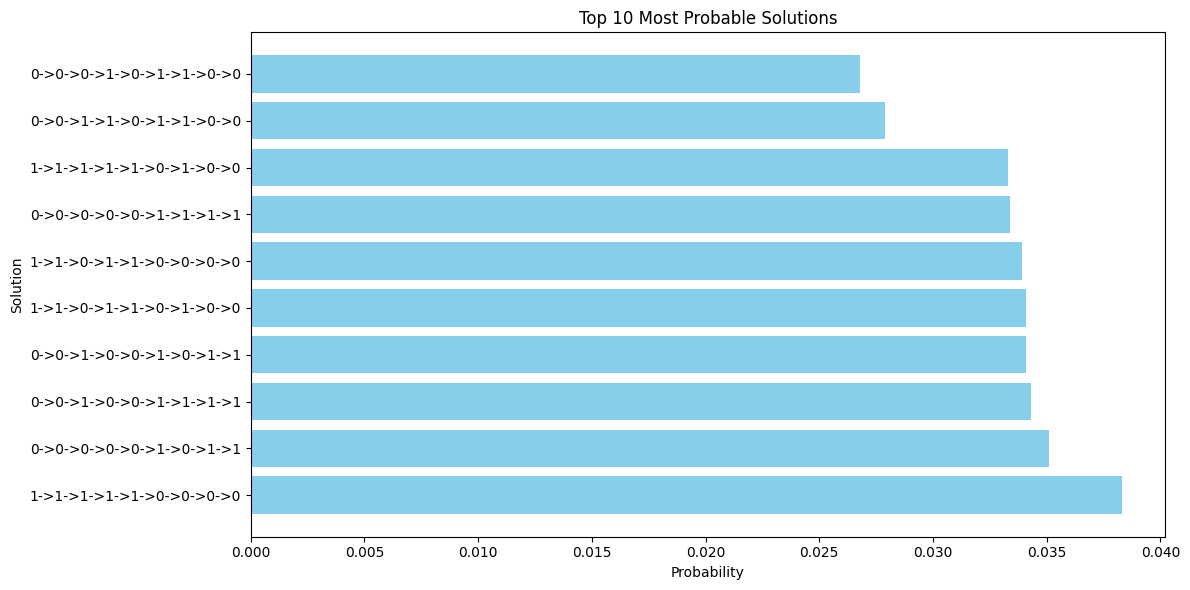

In [85]:


# Extract states and probabilities
states, probs = zip(*solutions_with_probs[:10])

# Create the plot
plt.figure(figsize=(12, 6))
plt.barh(range(len(states)), probs, align='center', color='skyblue')
plt.yticks(range(len(states)), states)
plt.xlabel('Probability')
plt.ylabel('Solution')
plt.title('Top 10 Most Probable Solutions')
plt.tight_layout()
plt.show()